In [5]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils.utils import load_df
from utils.plots import plot_perf, plot_train_convergence, plot_spec_metric, plot_spec_metric_2
from pathlib import Path

sns.set()

palette = {"incremental": "orange", "baseline" : "green"}
hue_order = ['baseline', 'incremental']
hue = 'curriculum_setting'
hue_settings = {"hue": hue, "palette": palette, "hue_order": hue_order}

BASE_DIR = Path('results/curriculum_set3')


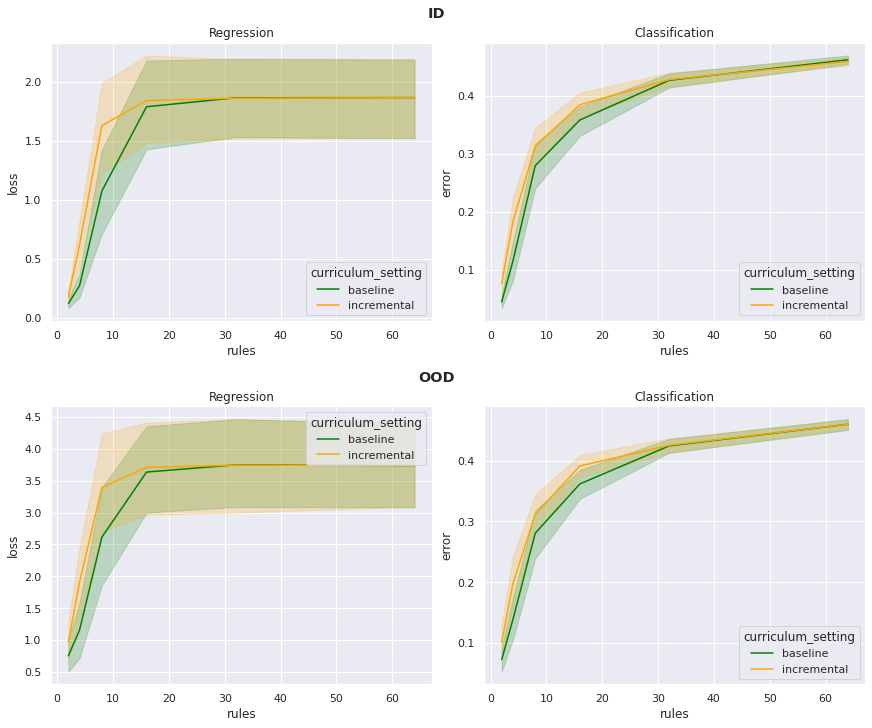

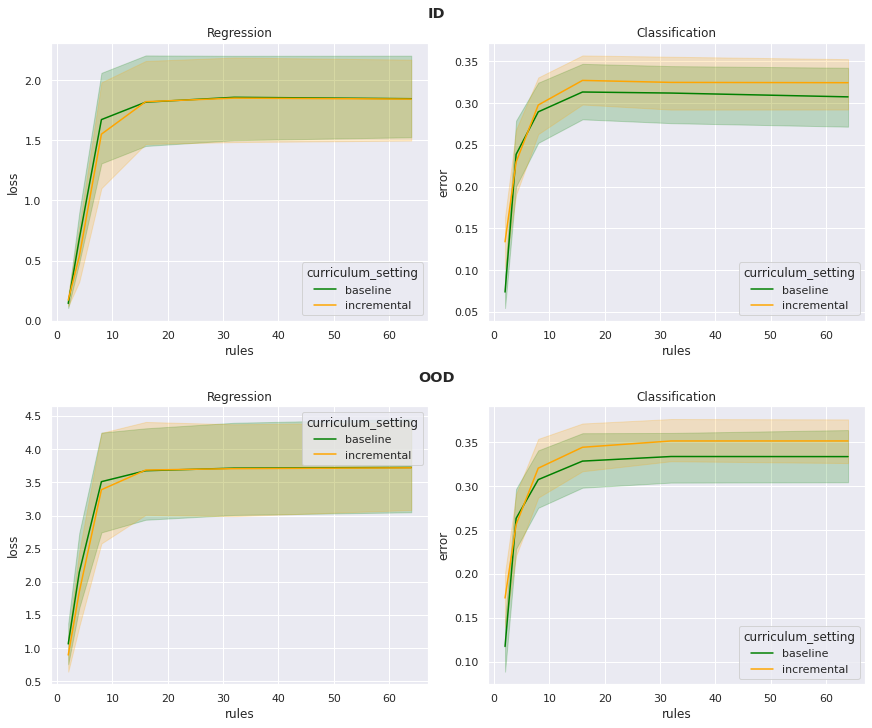

In [4]:
df = load_df(BASE_DIR / 'eval_results.pk')

df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.loc[df['setting'] == 'mod_dich']
df = df.loc[df['seq_len'] != 10]  # Only look at train seq_len
plot_perf(df, save_path=None, **hue_settings)


df = load_df(BASE_DIR / 'eval_results.pk')

df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.loc[df['setting'] == 'mod']
df = df.loc[df['seq_len'] != 10]  # Only look at train seq_len
plot_perf(df, save_path=None, **hue_settings)

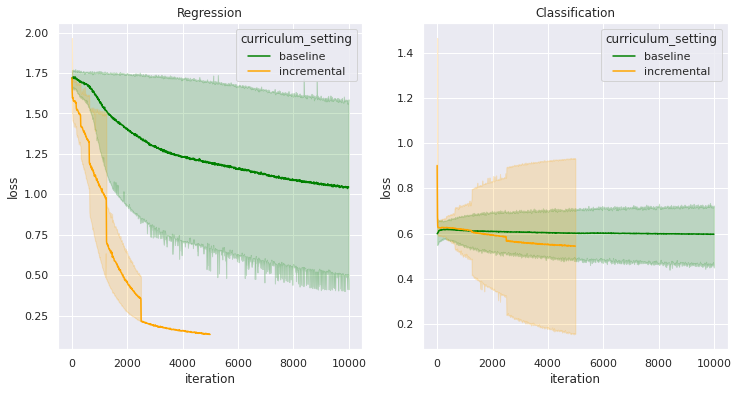

In [12]:
df = load_df(BASE_DIR / 'train_results.pk')
df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
gb_cols = df.columns.to_list()
gb_cols.remove('data_seed')
gb_cols.remove('rule_seed')
gb_cols.remove('value')
# gb_cols.remove('n_op')
df = df.groupby(gb_cols, as_index=False).mean()
df = df.loc[df['setting'] == 'mod_dich']
df = df.loc[df['seq_len'] == 10]
plot_train_convergence(df, save_path=None, **hue_settings)

(<Figure size 864x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Regression'}, xlabel='# Rules', ylabel='Adaptation'>,
        <AxesSubplot:title={'center':'Classification'}, xlabel='# Rules', ylabel='Adaptation'>],
       dtype=object))

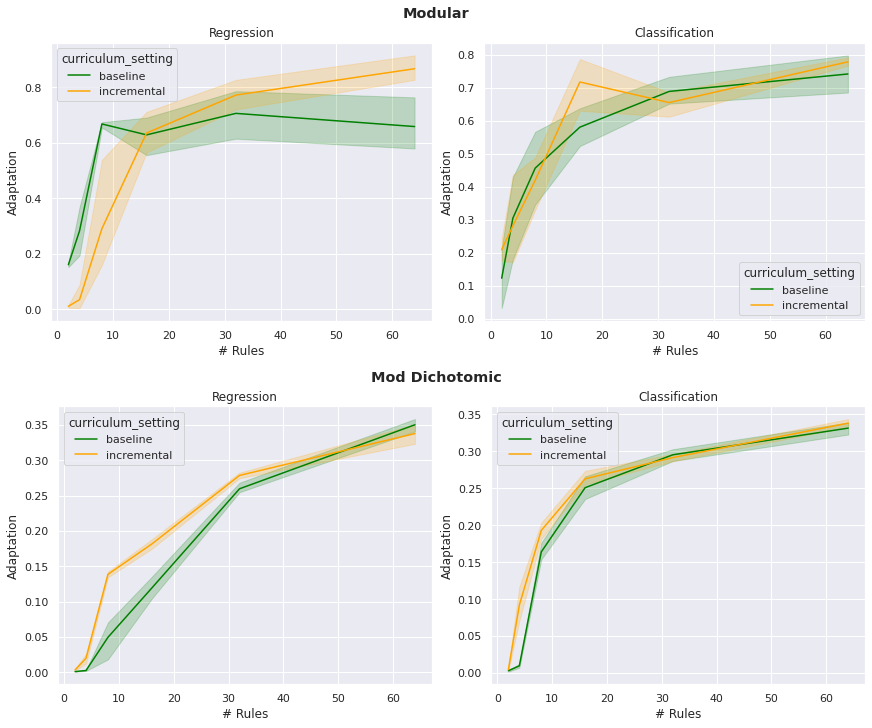

In [10]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

df = load_df(BASE_DIR / 'spec_results.pk')
df = df.loc[(df['seq_len'] == 10)]
df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
# gb_cols = df.columns.to_list()
# gb_cols.remove('seed')
# gb_cols.remove('spec')
# df = df.groupby(gb_cols, as_index=False).mean()


plot_spec_metric_2(df, y='spec', ylabel='Adaptation', save_path=None, **hue_settings)


Index(['n_op', 'type', 'setting', 'curriculum_setting', 'model', 'data_seed',
       'rule_seed', 'seq_len', 'x_dim', 'enc_dim', 'hidden_dim',
       'collapse_avg', 'collapse_worst', 'hungarian'],
      dtype='object')

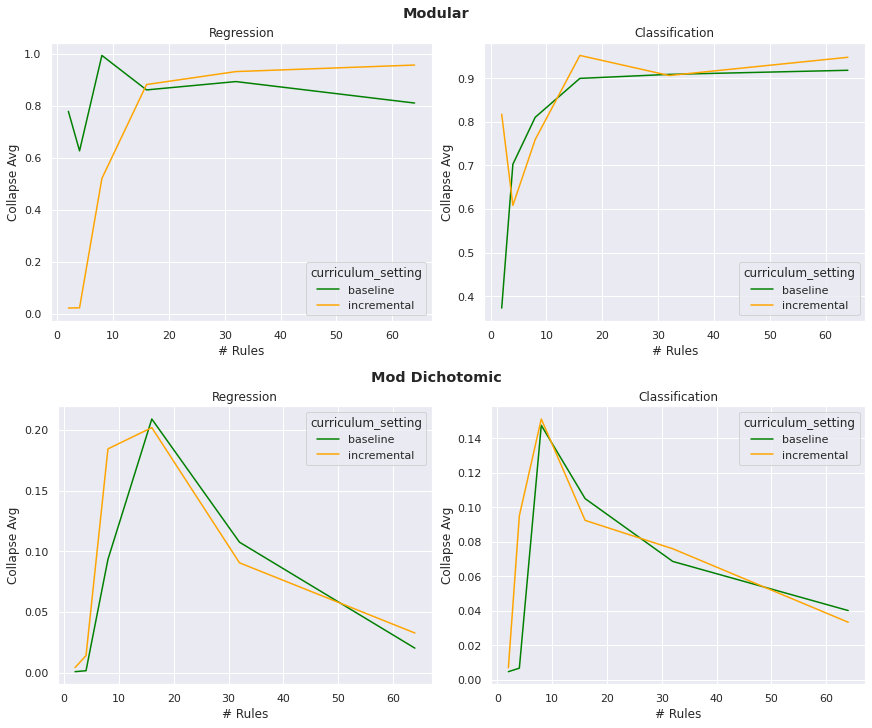

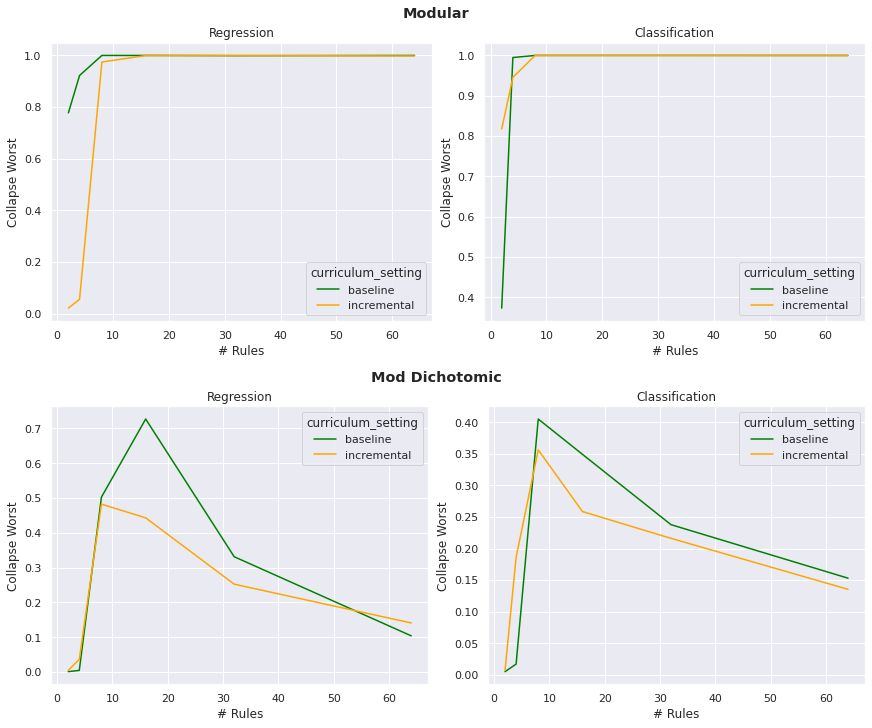

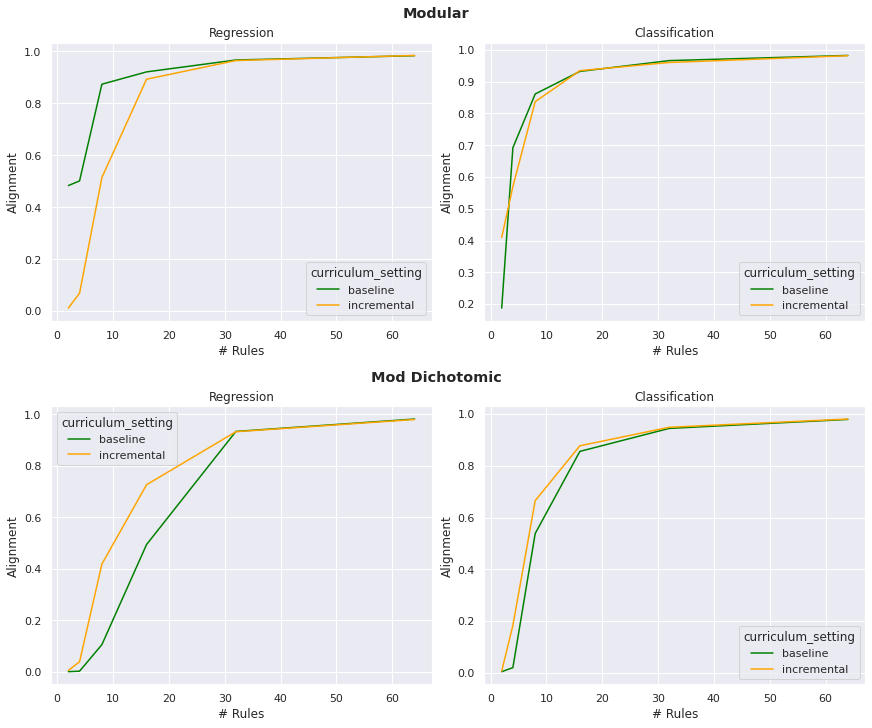

In [6]:

df = load_df(BASE_DIR / 'prob_results.pk')
df.loc[df['curriculum_setting'] == 'vanilla', 'curriculum_setting'] = 'baseline'
df = df.loc[(df['seq_len'] == 10)]
df = df.groupby(by=['n_op', 'type', 'setting',
                'curriculum_setting', 'model'], as_index=False).mean()



plot_spec_metric_2(df=df, y='collapse_avg', ylabel='Collapse Avg', save_path=None, **hue_settings)
plot_spec_metric_2(df=df, y='collapse_worst', ylabel='Collapse Worst', save_path=None, **hue_settings)
plot_spec_metric_2(df=df, y='hungarian', ylabel='Alignment', save_path=None, **hue_settings)

df.columns
